<a href="https://colab.research.google.com/github/cfreeman22/AllLifeBankCustomer_Segmentation/blob/main/AllLifeBankCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All Life Bank Customer Segmentation
Presented By Christian Freeman March 2022

# Project Planning
## Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

## Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
 
from sklearn.decomposition import PCA
import wrangle
from scipy.stats import zscore

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
# to compute distances
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [2]:
raw = pd.read_excel('Credit+Card+Customer+Data.xlsx')

In [3]:
raw.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
raw.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
raw.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
df =raw.copy()

In [7]:
raw.Sl_No.nunique()

660

In [8]:
raw['Avg_Credit_Limit'].nunique()

110

In [9]:
raw['Customer Key'].nunique()

655

In [10]:
raw['Customer Key'].value_counts()

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64

In [11]:
raw[raw['Customer Key'] == 97935]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [12]:
raw[raw['Customer Key'] == 50706]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


In [13]:
raw[raw['Customer Key'] == 47437]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


In [14]:
raw[raw['Customer Key'] == 37252]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


In [15]:
raw[raw['Customer Key'] == 96929]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


In [16]:
raw[raw['Customer Key'].duplicated()].count()

Sl_No                  5
Customer Key           5
Avg_Credit_Limit       5
Total_Credit_Cards     5
Total_visits_bank      5
Total_visits_online    5
Total_calls_made       5
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [18]:
# Checking for duplicates
df[df.duplicated()].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [19]:
# let's check for duplicate observations
df.duplicated().sum()

0

In [20]:
# Checking for nulls
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [21]:
# Descriptives Statistics
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [22]:
# Value counts of all variables
for column in df.columns.to_list():
    print(df[column].value_counts())
    print('===================================')
    print()

1      1
435    1
437    1
438    1
439    1
      ..
221    1
222    1
223    1
224    1
660    1
Name: Sl_No, Length: 660, dtype: int64

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64

8000      35
6000      31
9000      28
13000     28
19000     26
          ..
43000      1
146000     1
155000     1
200000     1
167000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

2    158
1    112
0    100
3    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
10      6
12      6
8       6
11      5
13      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

4     108
0      97
2      91
1      90
3      83
6      39
7    

## Observations
- The dataframe contains 660 rows and 7 columns
- There are 5 duplicated values for custome keys in the data set , but a clear examination shows that the values attached to those keys are different. We will not be droping those duplicates
- Avg_Credit_Limit is skewed  with a mean of 34574.242424 , a min of 3000.0 , and a max of 200000 
- Total_Credit_Cards has a mean of 5 , a min of 1, and a max of 10 
- Total_visits_bank	has a mean of 2.5 , a min of 0 , and a max of 5
- Total_calls_made	has a mean of 3.5 , a min of 0 , and a max of 10
- There is no missing values
- There is no duplicate observations


### Action plan
- Univariate analysis
- bivariate analysis

# Exploratory Data Analysis
## Univariate analysis
- Creating variables for categorical and numerical to help with exploring

In [23]:
#df['avg_credit_lim_per_card'] = df.Avg_Credit_Limit / df.Total_Credit_Cards

In [24]:
cat_var = [ 'Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

quant_var = ['Avg_Credit_Limit']

all_cols = [ 'Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made','Avg_Credit_Limit']

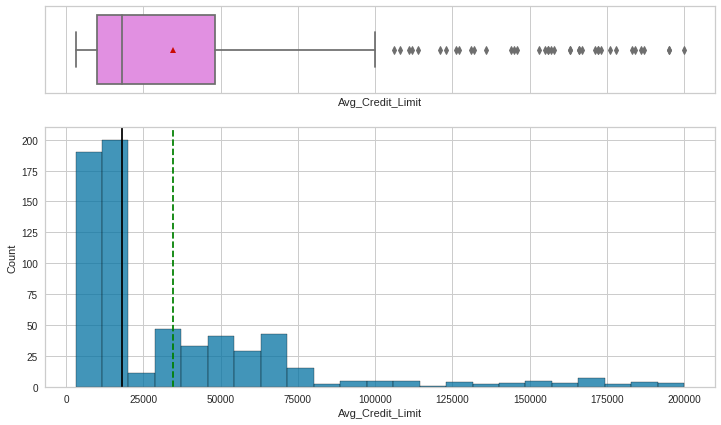

In [25]:
for x in quant_var:
    wrangle.histogram_boxplot(df, x) #Analysing numeric variables using our predefined module stored in the wrangle file

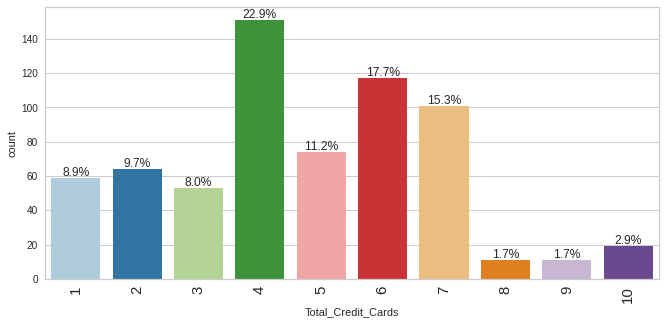

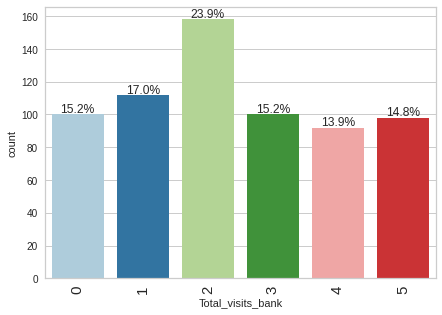

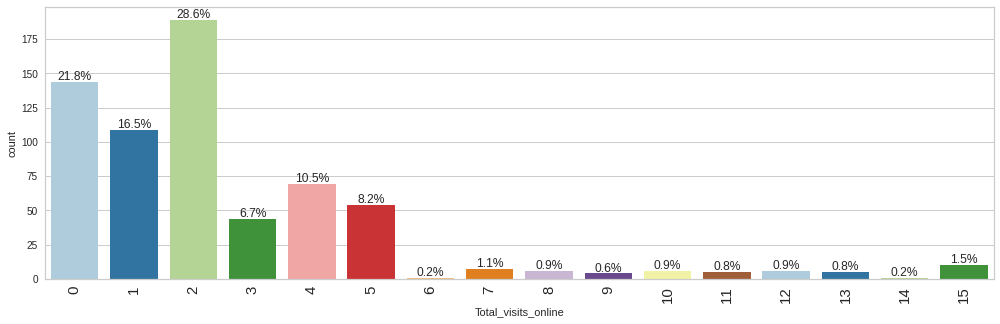

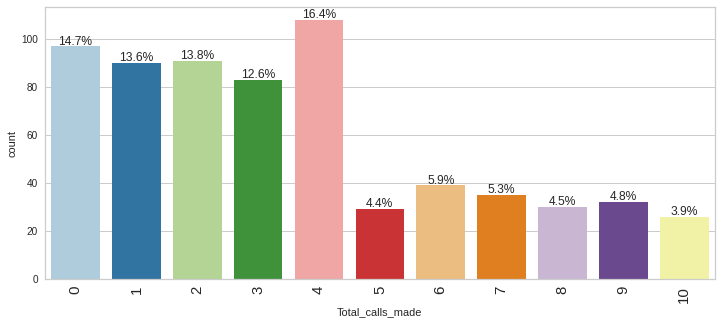

In [26]:
for x in cat_var:
    wrangle.labeled_barplot(df, x, perc=True) #Analysing categorical variables using our predefined module stored in the wrangle file

### Takeaway univariate analysis
- Most ustomers have an average credit limit of less than 20 000.  With a maximum of 200 000 , there many outliers in this column
- 4, 5, 6, and 7 credit cards represent 22.9%, 11.2%, 17.7%, 15.3% percent of the entire data set.
- 1.7% of customers have 8 credit cards
-  23.9 % of customers visit the bank 2 times, 15.2% never visist the banks , and 14.8 % visit the bank more that 4 times
- 21.8% never visist the bank's website, while 1.5% visit the ebsite more than 14 times, and 28.6% visit the baks website 2 times
- 14.7% never makes calls to the bank, 3.9% called the bank 10 times, and 16.4% call the bank 4 times 

## Bivariate analysis

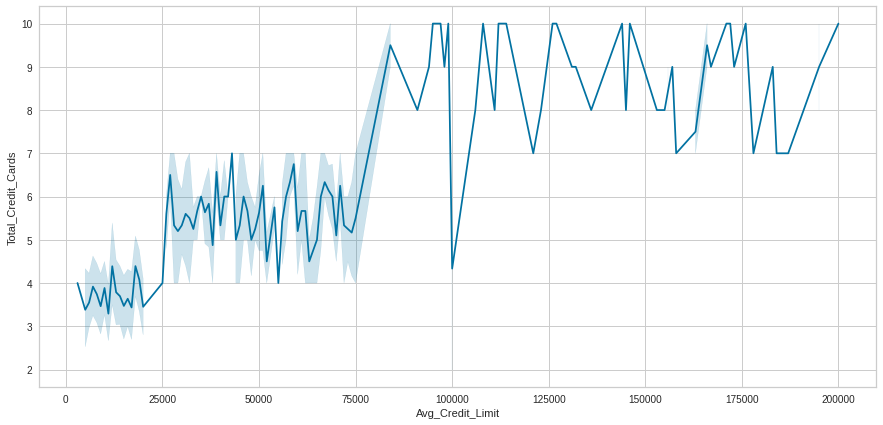

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(df["Avg_Credit_Limit"],df["Total_Credit_Cards"],palette='winter')
 
plt.show()

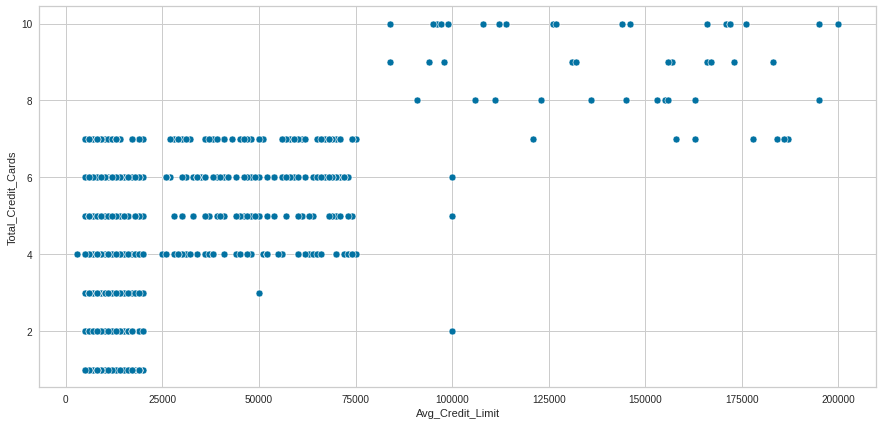

In [28]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_Credit_Cards"],ci=0.,palette="Dark2")
 
plt.show()

- Customers with up to 7 cards have between 25000 and 75 000 average credit limit
- Customers with more than 7 cards have between 75K to 200k avreage credit limit
- Customewrs with less than 5 cards have below 20k average credit limit
- There is high numbers of customers who have between 1 to 75k , and those above 75k are outliers

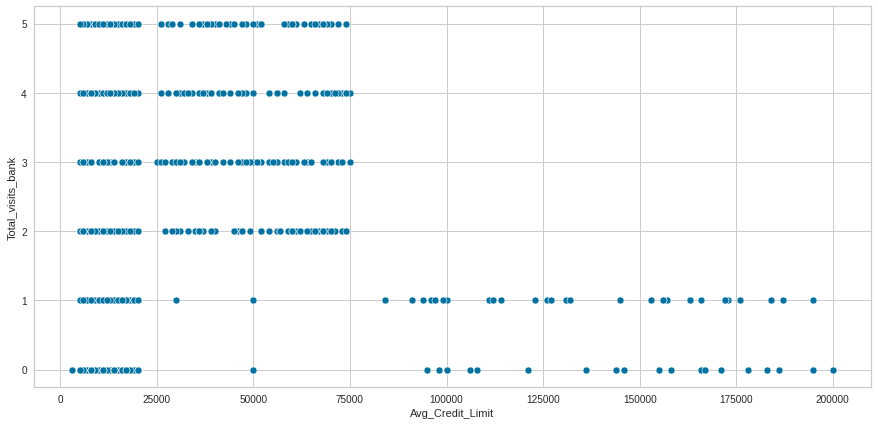

In [29]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_visits_bank"],ci=0.,palette="Dark2")
 
plt.show()

- There are Customers with 0 -2 visits to the bank who have from 75k to 200k average credeit limit
- another group of customers with 2 - 5 visits to the bank have from 25k to 75 k  average credit limit
- Customers with less than 25K average credit limit visit the bank more often than any other group

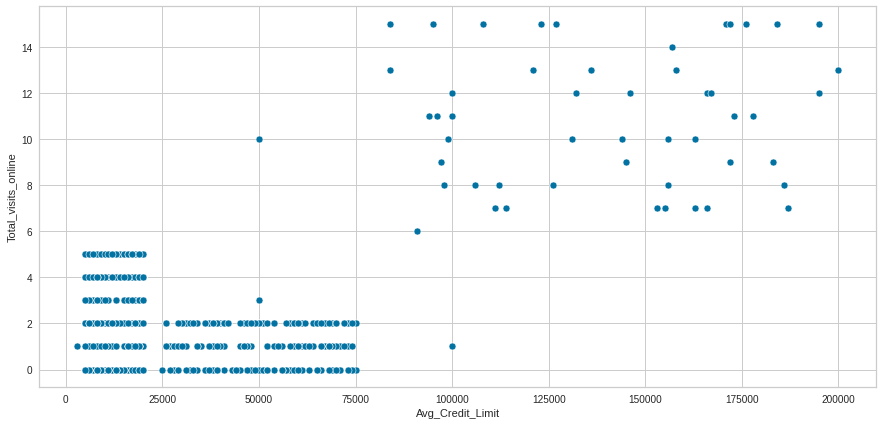

In [30]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_visits_online"],ci=0.,palette="Dark2")
plt.show()

- Customers with less than 25k average credit limit have between 0 o 5 online visits to the bank's website
- Customers having between 25k to 75k credit limit have less visit to online banking 0 - 2 onlin visits
- Customers with the most online visits from 6 - 14, have between 75k and 200k average credit limit


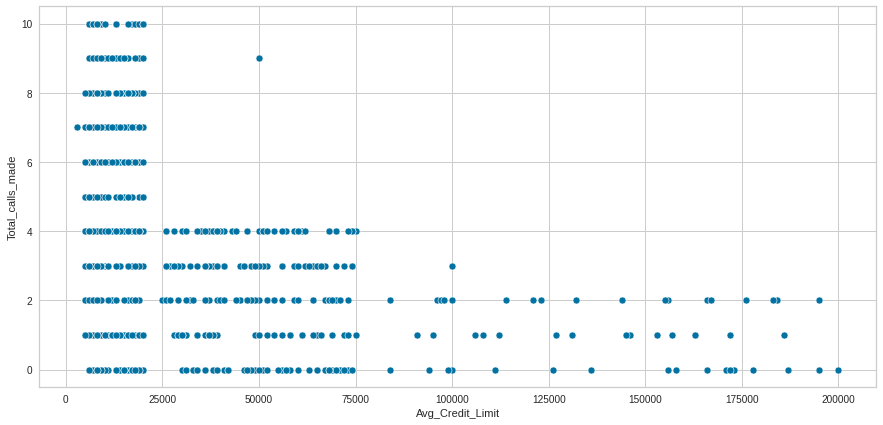

In [31]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_calls_made"],ci=0.,palette="Dark2")
plt.show()

- There are Customers with 0 - 2 calls to the bank who have from 75k to 200k average credeit limit
- another group of customers with 0- 4 calls to the bank have from 25k to 75 k  average credit limit
- Customers with less than 25K average credit limit visit the bank more often than any other group. up to 10 calls

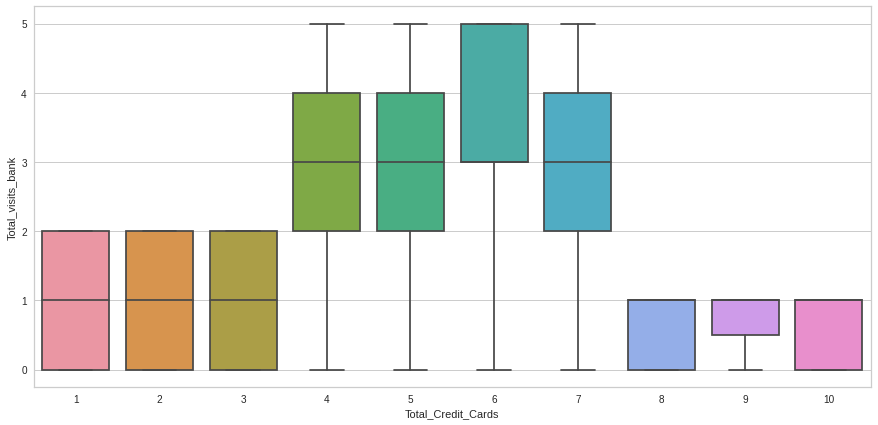

In [32]:

plt.figure(figsize=(15,7))
sns.boxplot(df["Total_Credit_Cards"],df["Total_visits_bank"])
  
plt.show()

- Customers with less than 4 credits card visit the bank 0 - 2 times
- Customers who have between 4 - 7 credits card visit the bank at least twice, and more than any other group
- Customers with more than 7 credits cards  visit the bank less often


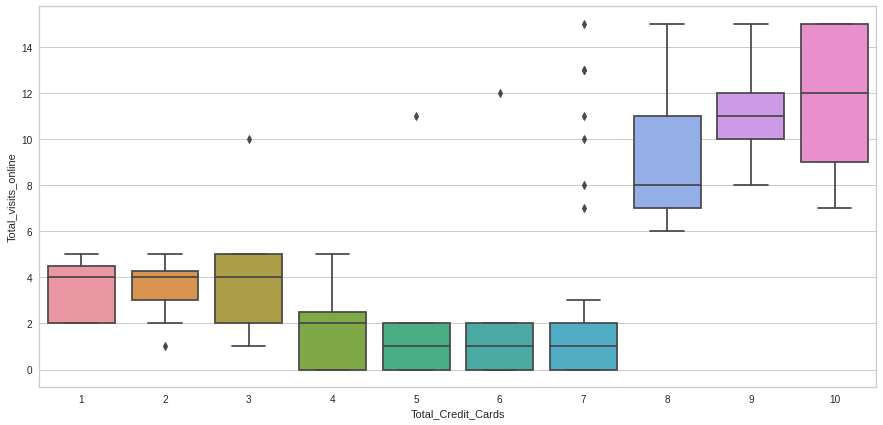

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_Credit_Cards"],df["Total_visits_online"])
plt.show()

- Customers with less than 4 credits card have a least 2 online visits to the bank
- Customers who have between 4 - 7 credits card have less than 2 online visit the bank, and less than any other group
- Customers with more than 7 credits cards have more online visit the bank than any other group

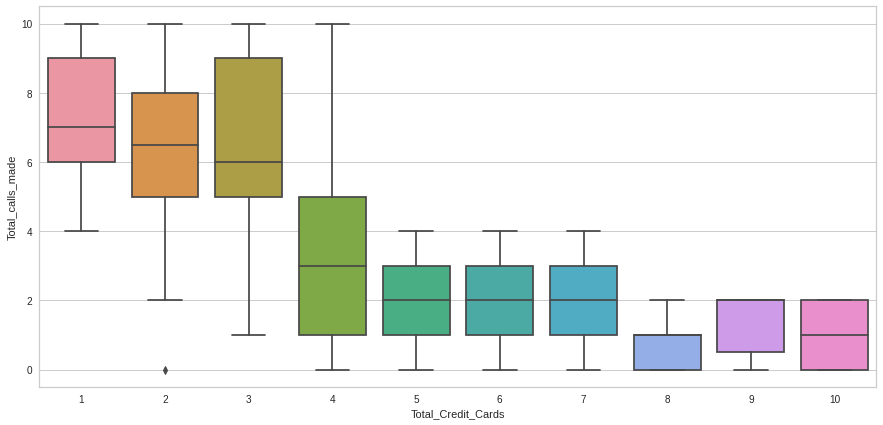

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_Credit_Cards"],df["Total_calls_made"])
 
plt.show()

- Customers with less than 4 credits card call the bank more than any other customer group
- Customers who have between 4 - 7 credits card call the bank less than 4 times,
- Customers with more than 7 credits cards  call the bank less often

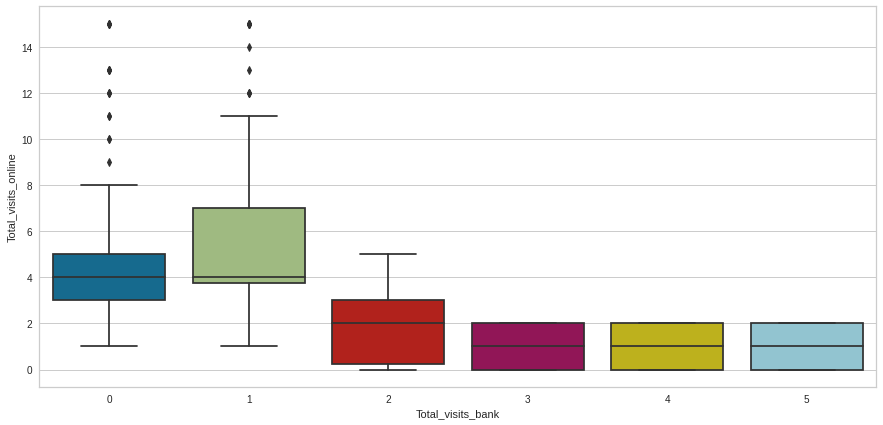

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_visits_bank"],df["Total_visits_online"])
plt.show()

- Customers with less physical visit to the bank are less likely to visit the bank online
- Customers with less than 2 physicall visit to the bank are more likely than any other group to visit the bank online

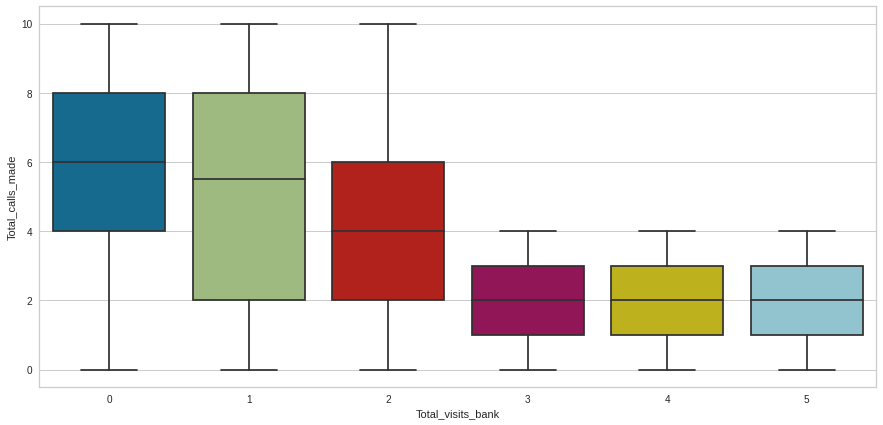

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_visits_bank"],df["Total_calls_made"])
 
plt.show()

- Customers with less physical visit to the bank are less likely to call the bank 
- Customers with less than 2 physical visit to the bank are more likely than any other group to call the bank 

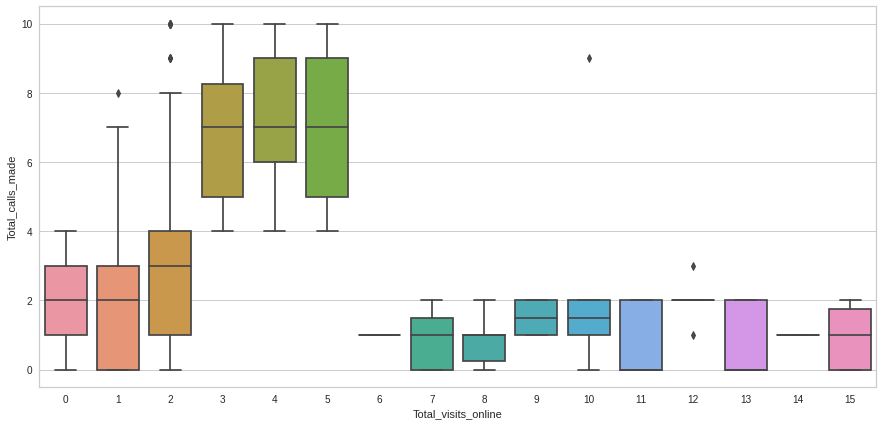

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_visits_online"],df["Total_calls_made"])
plt.show()

- Customers with less than 2 calls made to the bank have 6 or more online visit to the bank than any other customer group
- Customers who have  4 total  calls and above to the bank have between 3 and 5 total online visit to the bank
- Customers with more less than 3 total online visits to the bank make 4 or less calls to the bank with the exception of outliers makeking more than 4 calls

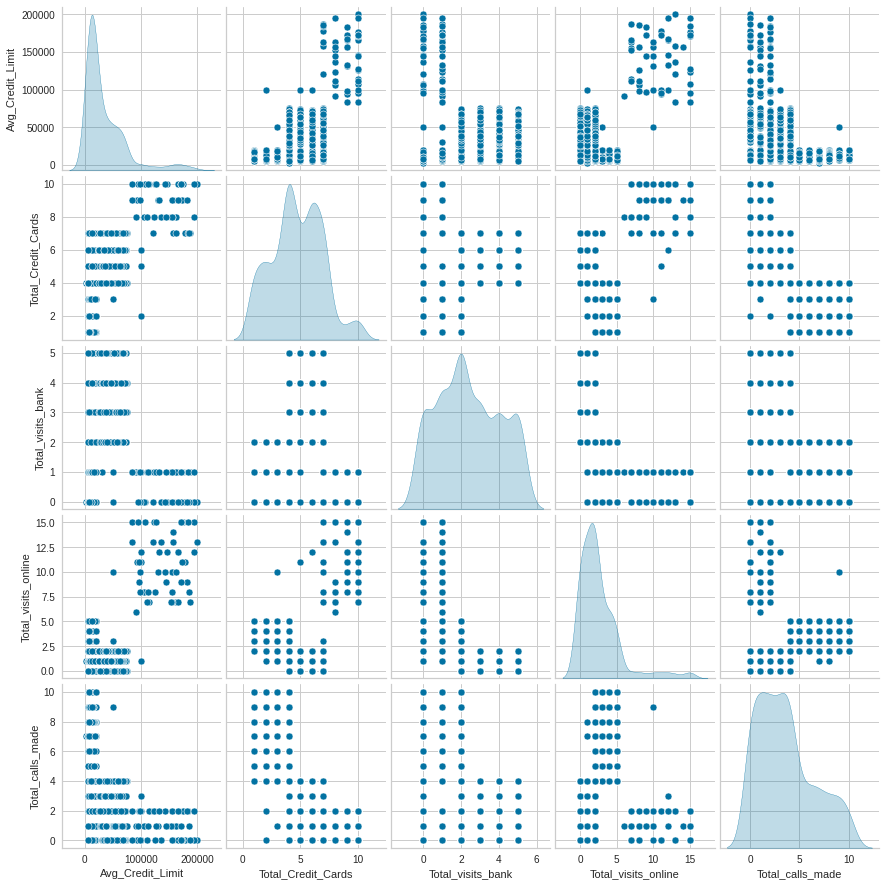

In [38]:
sns.pairplot(data=df.drop(["Sl_No","Customer Key"],axis=1), diag_kind="kde")
plt.show()

- The pair plot basically summarize the bivariate charts

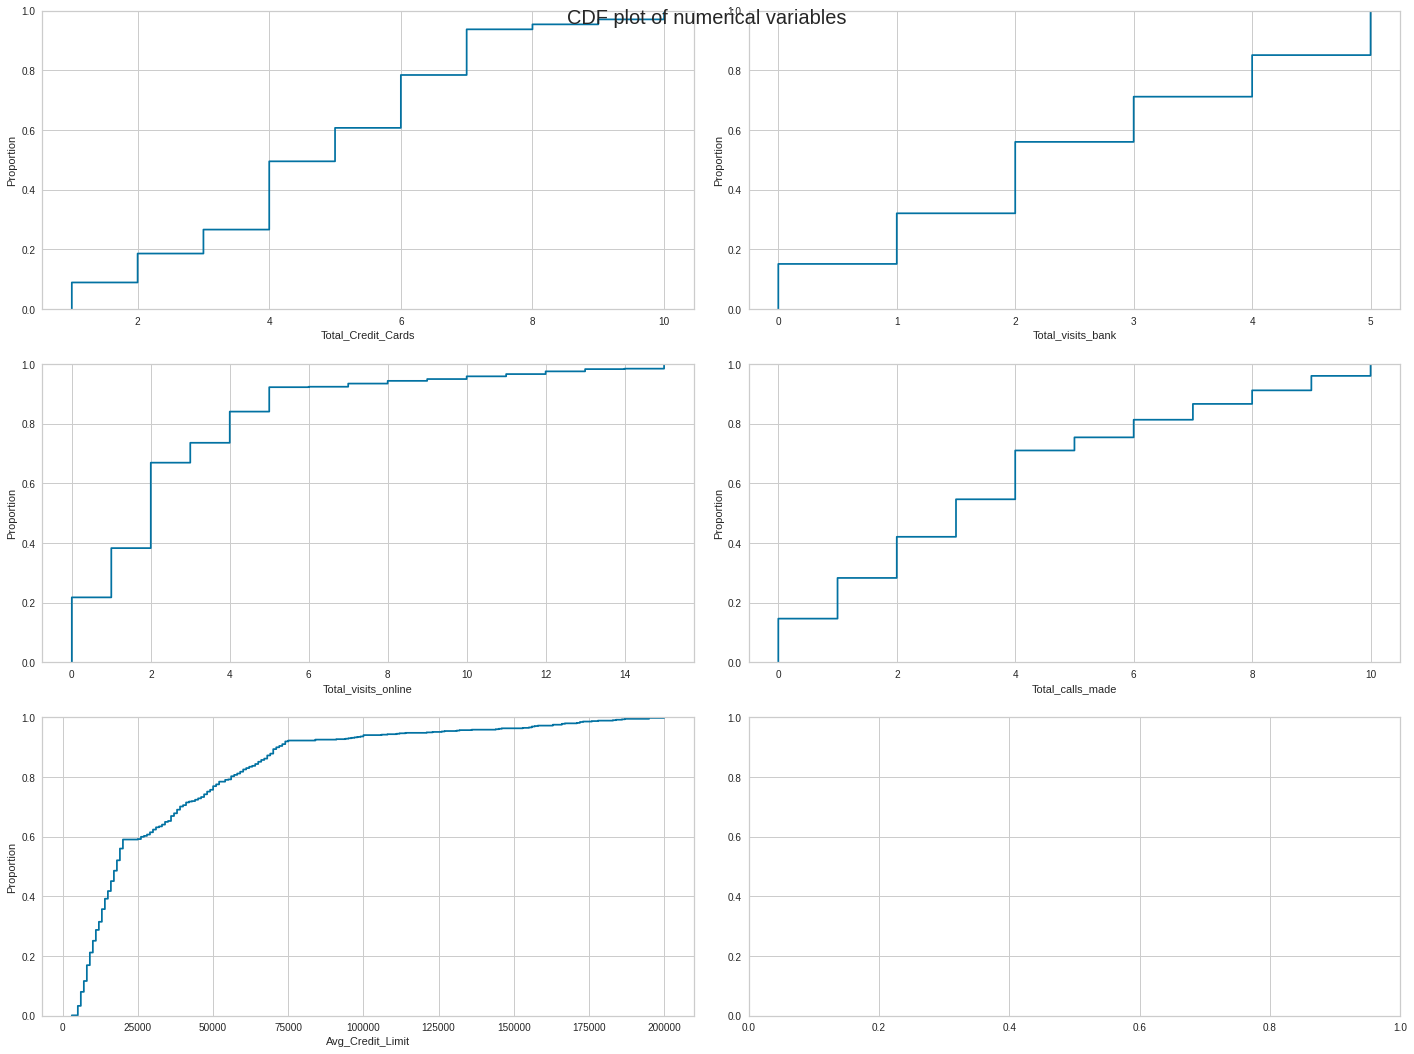

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[all_cols[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[all_cols[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

- 80% of cusrtomers have less than 7 total credits cards
- 70% or less visit the bank 4 times or less
- 80% of cusrtomers have 5 visits or less than 5 to the bank
- 80% of cusrtomers make 6 calls or less than 6 calls  to the bank
- 60% have less than 25 k average credit limit

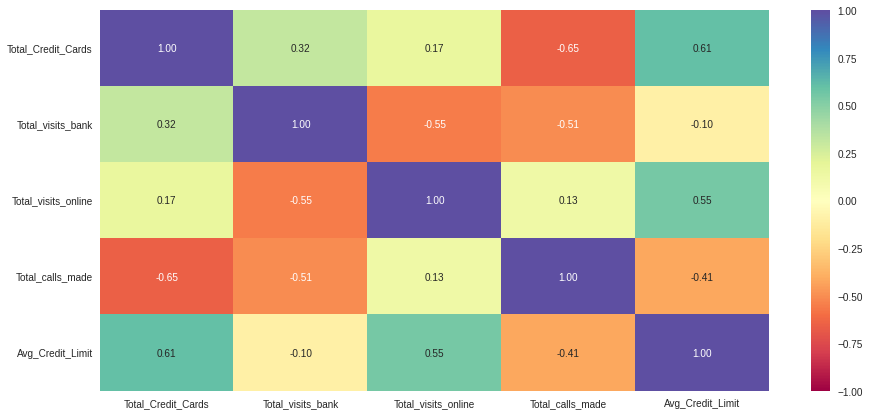

In [40]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[all_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Average credit limit and total credit card are correlated
- Average credit limit and total online visits are correlated
- Calls made and total credit card are negatively correlated which indicates that customers making the most calls have fewr credit cards

# Data preprocessing
- No missing values
- outlier treatment is not necessary
- droping S!_no and customer keys
- We will be scaling our data for clustering

In [41]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [42]:
df.drop(["Sl_No","Customer Key"], axis=1, inplace =True)

# Applying K-means Clustering

In [43]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[all_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [44]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.006922226250362
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620169
Number of Clusters: 6 	Average Distortion: 0.9430693962124551
Number of Clusters: 7 	Average Distortion: 0.9093703386475
Number of Clusters: 8 	Average Distortion: 0.889334054749758


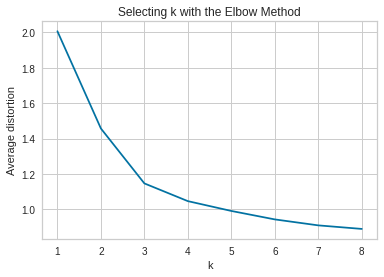

In [45]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

- Appropriate value for k seems to be 3 or 4.
- Let's check the silhouette scores.

For n_clusters = 2, the silhouette score is 0.41842496663214307)
For n_clusters = 3, the silhouette score is 0.5157182558880935)
For n_clusters = 4, the silhouette score is 0.3556670619372023)
For n_clusters = 5, the silhouette score is 0.2717470361089191)
For n_clusters = 6, the silhouette score is 0.24770209495977732)
For n_clusters = 7, the silhouette score is 0.2485775766777137)
For n_clusters = 8, the silhouette score is 0.2263903589077086)
For n_clusters = 9, the silhouette score is 0.22395917057689285)


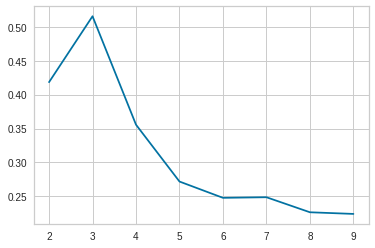

In [46]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- Silhouette score for 3 is higher than that for 4. So, we will choose 3 as value of k.

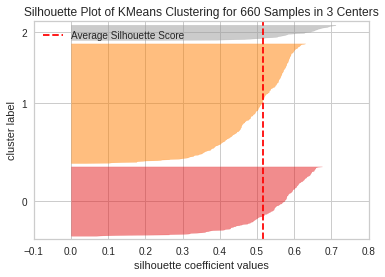

In [47]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [48]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [49]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [50]:
cluster_profile = df.groupby("K_means_segments").mean()

In [51]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)


In [52]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


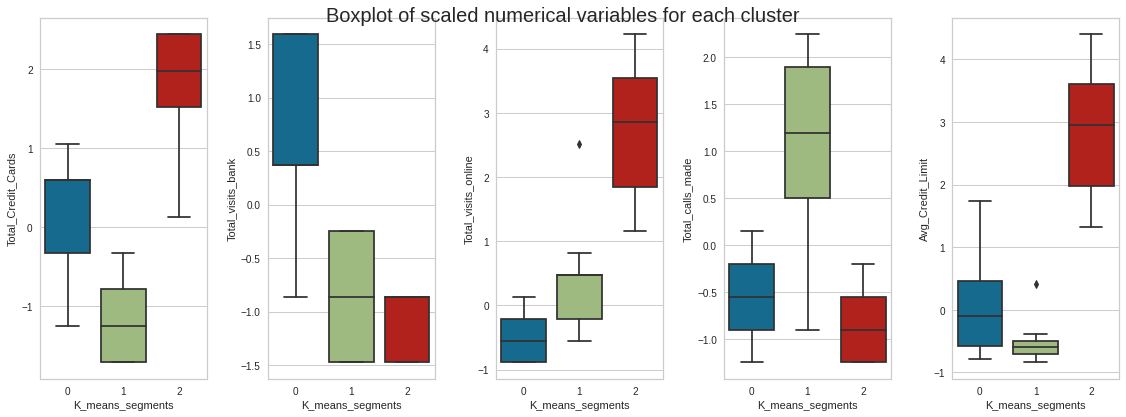

In [53]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[all_cols[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

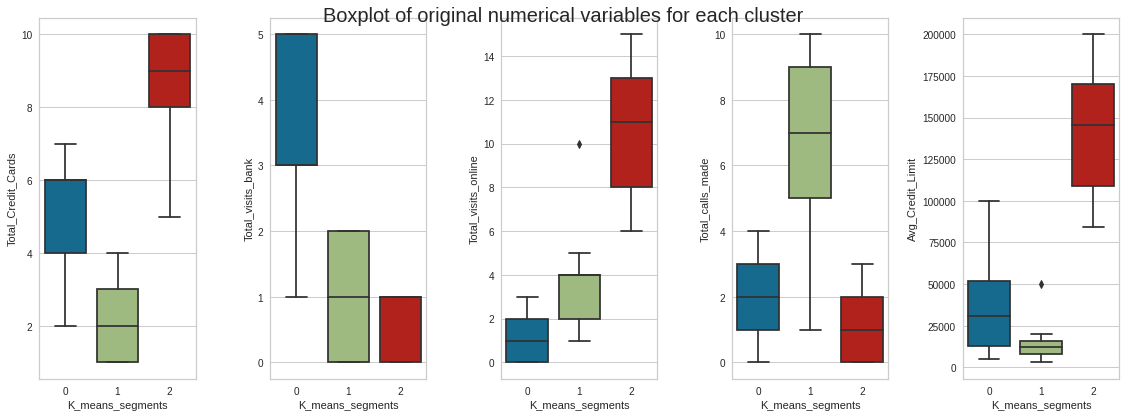

In [54]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[all_cols[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Take away K-means
### Cluster 0
- In this clusters, most customers have between 4 and 6 credits cards
- Physical bank visits are from 3 to 5
- online visits are 2 or less
- Average call to the bank is 2
- Average credit limit is above 25k
### Cluster 1
- In this clusters, most customers have an average of 2 credits cards
- Physical bank visits has an average of 1
- online visits is typically 4 or less 
- Average call to the bank is 7
- Average credit limit is less than  25k
### Cluster 2
- In this clusters, most customers have an average of 9 credits cards
- Physical bank visits is less than 1
- online visits have an average of 11 
- Average call to the bank has an average of 1
- Average credit limit is about  145k

# Applying Hierarchical Clustering


In [55]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8788676940541079.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8860521900934338.
Cophenetic correlation for Euclidean distance and average linkage is 0.9168725782090766.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9133393931042242.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8978014062578786.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8623270916886306.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9160784250471772.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9109044268579872.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8959952526724227.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6550023123197851.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8467618899578888.
Cophenetic co

In [56]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9168725782090766, which is obtained with Euclidean distance and average linkage.


## Let's explore different linkage methods with Euclidean distance only.

In [57]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8788676940541079.
Cophenetic correlation for complete linkage is 0.8860521900934338.
Cophenetic correlation for average linkage is 0.9168725782090766.
Cophenetic correlation for centroid linkage is 0.9134704636213649.
Cophenetic correlation for ward linkage is 0.774233615737438.
Cophenetic correlation for weighted linkage is 0.9133393931042242.


In [58]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9168725782090766, which is obtained with average linkage.


### Observations
- We see that the cophenetic correlation is maximum with Eucledian distance, and average linkage.
 

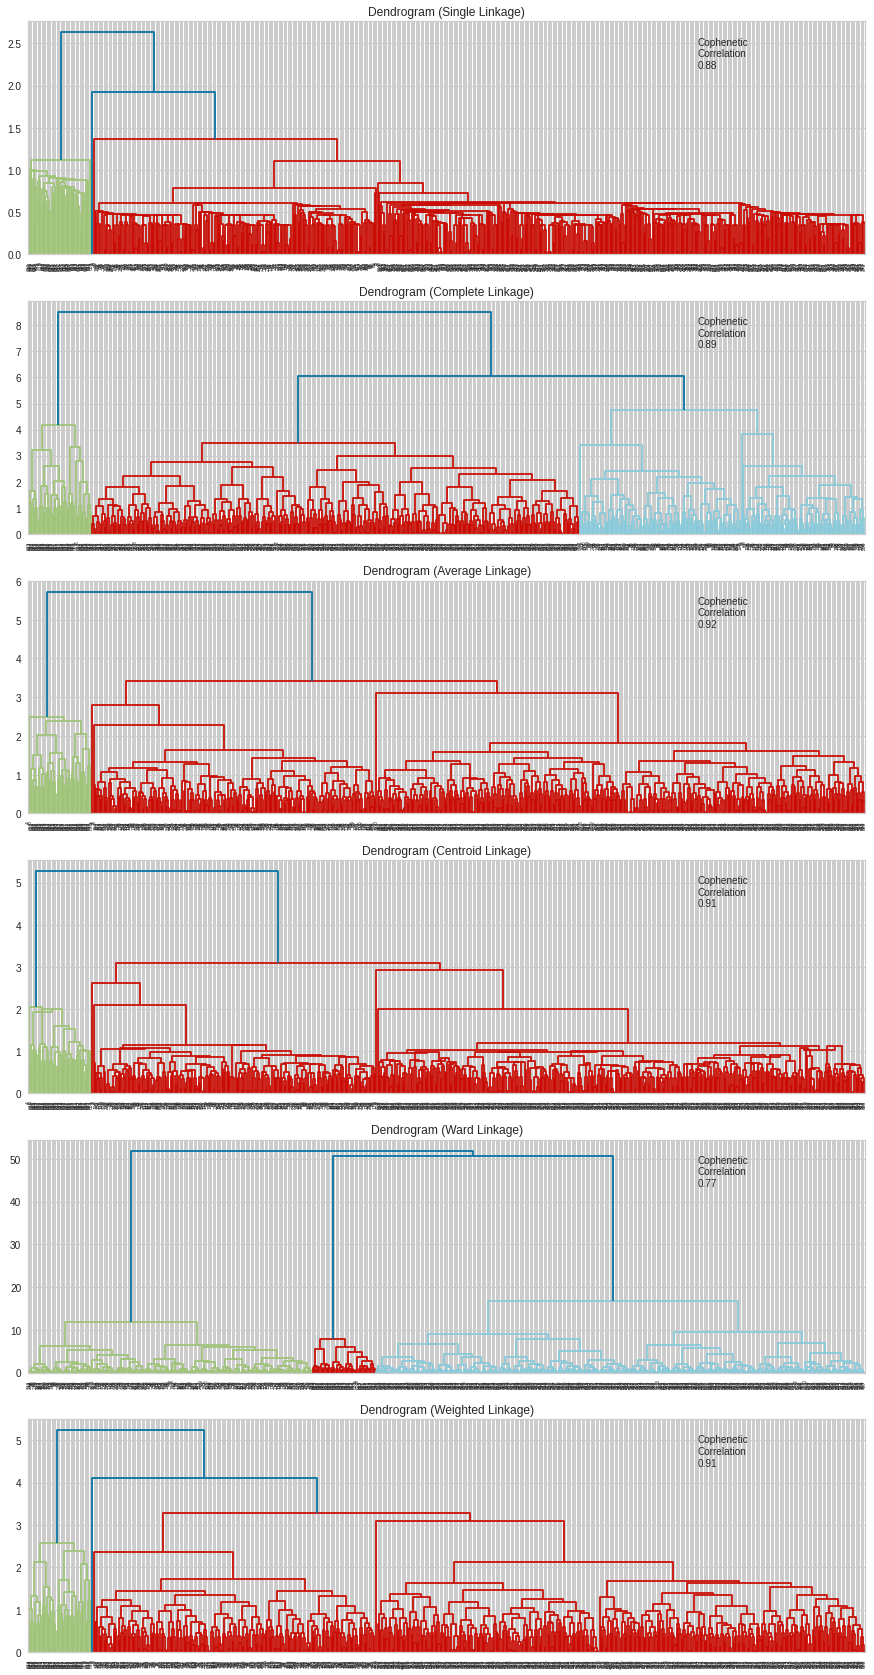

In [59]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

### Observations

- Dendrogram for Ward linkage shows distinct and separate clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.

In [60]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [61]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [62]:
cluster_profile2 = df.groupby("HC_Clusters").mean()

In [63]:
cluster_profile2["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [64]:
# let's display cluster profiles
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12564.444444,2.408889,0.933333,3.542222,6.840000,0.995556,225
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,33610.389610,5.524675,3.496104,0.981818,2.005195,0.000000,385


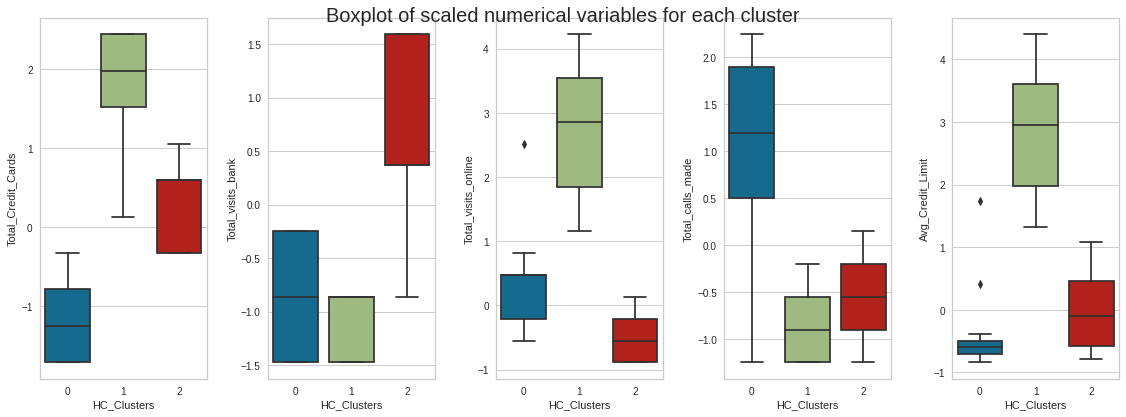

In [65]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[all_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

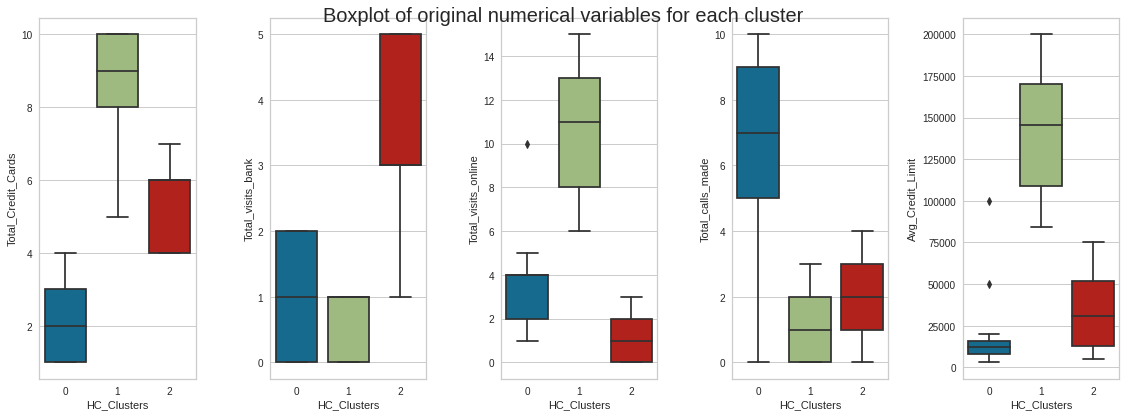

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[all_cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Takeaway Hierarchical Clustering
### Cluster 0
- In this clusters, most customers have between 4 and 6 credits cards
- Physical bank visits are from 3 to 5
- online visits are 2 or less
- Average call to the bank is 2
- Average credit limit is above 25k
### Cluster 1
- In this clusters, most customers have an average of 9 credits cards
- Physical bank visits is less than 1
- online visits is 11 on average
- Average call to the bank is 1
- Average credit limit is abou 145k
### Cluster 2
- In this clusters, most customers have an average of 2 credits cards
- Physical bank visits is an average of 1
- online visits are 4 or less
- Average call to the bank is 7
- Average credit limit is less than 25k

# K-means vs Hierarchical Clustering

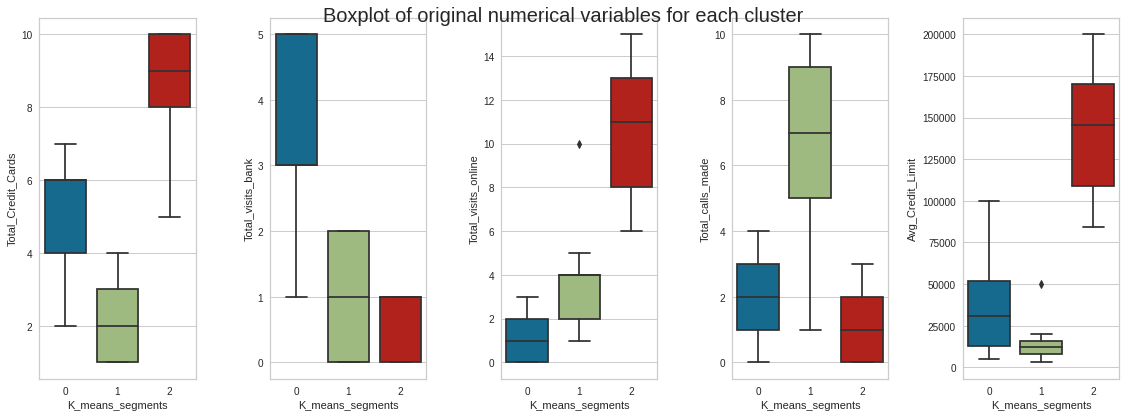

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[all_cols[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

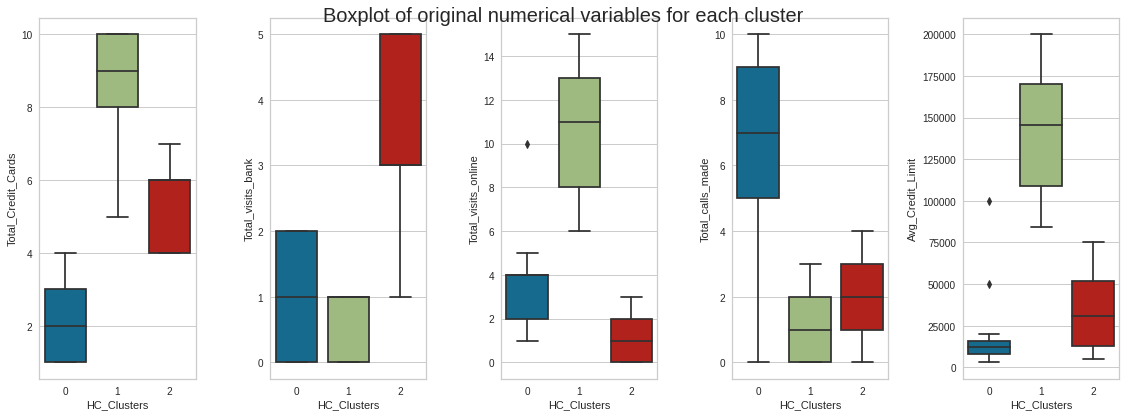

In [68]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[all_cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

- Kmeans and  Hierarchical Clustering are closely similar in terms clusters groups
  - Cluster 0 in Kmeans is closely similar to cluster 2 in Hierarchical Clustering
  - Cluster 1 in Kmeans is Similar to cluster 0 in Hierarchical Clustering
  - Cluster 2 in Kmeans is similar to cluster 1 in Hierarchical Clustering
  - Both clustering techniques tend to give closely similar observation not in the exact order of clusters

# Actionable Insights & Recommendations
Using Kmeans or Hierarchical clustering, we notice that Customers tend to be divided into three groups:

- In-person consumers prefer to do their banking in person. They have many credit cards and a moderate amount of accessible credit. They are the most active users as well.

- Phone users prefer to do business over the phone. They have the smallest number of credit cards and the lowest credit card limit.

- Online consumers prefer digital transactions. They also have the most credit cards and have the most credit accessible. This sort of behavior is seen in a small percentage of customers.

- Customers' choices should be used when contacting them. In-person customers may prefer mail notifications and advertising, whereas online/phone users prefer email/text notifications and advertising.

- The bank should concentrate its effort to promote internet baking to those who prefer to come in person or call on the phone
